# Classification Machine Learning Model

Goal: Apply different classification ML algorithms to predict whether a person is diabetic or not. The main purpose is to learn and understand each algorithm.
At the end, the model with highest score is used for deployment.  


In [1]:
#!pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scikitplot as skl
sns.set()

# ignore warnings
import warnings
warnings.simplefilter('ignore')

/home/xavier/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

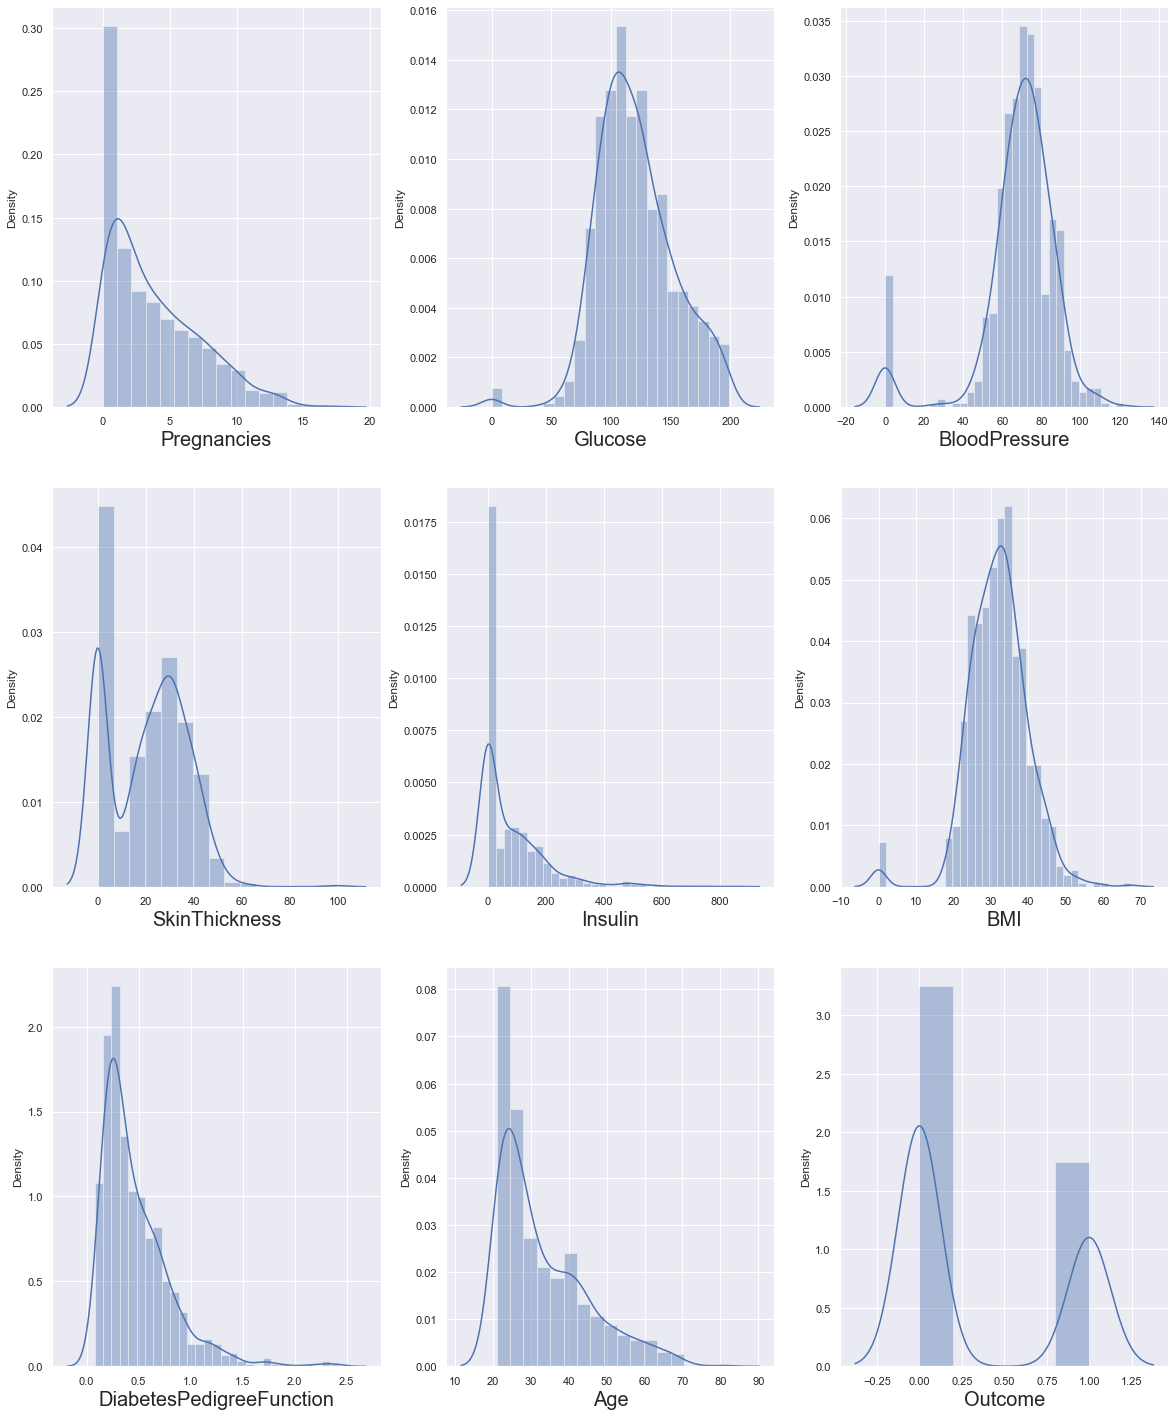

In [7]:
# Columns relationship
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

There are data in columns Glucose, BloodPressure,SkinThickness, Insulin, BMI which have value as 0. That is not possible.
Let us replace those values with the mean.

In [8]:
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())

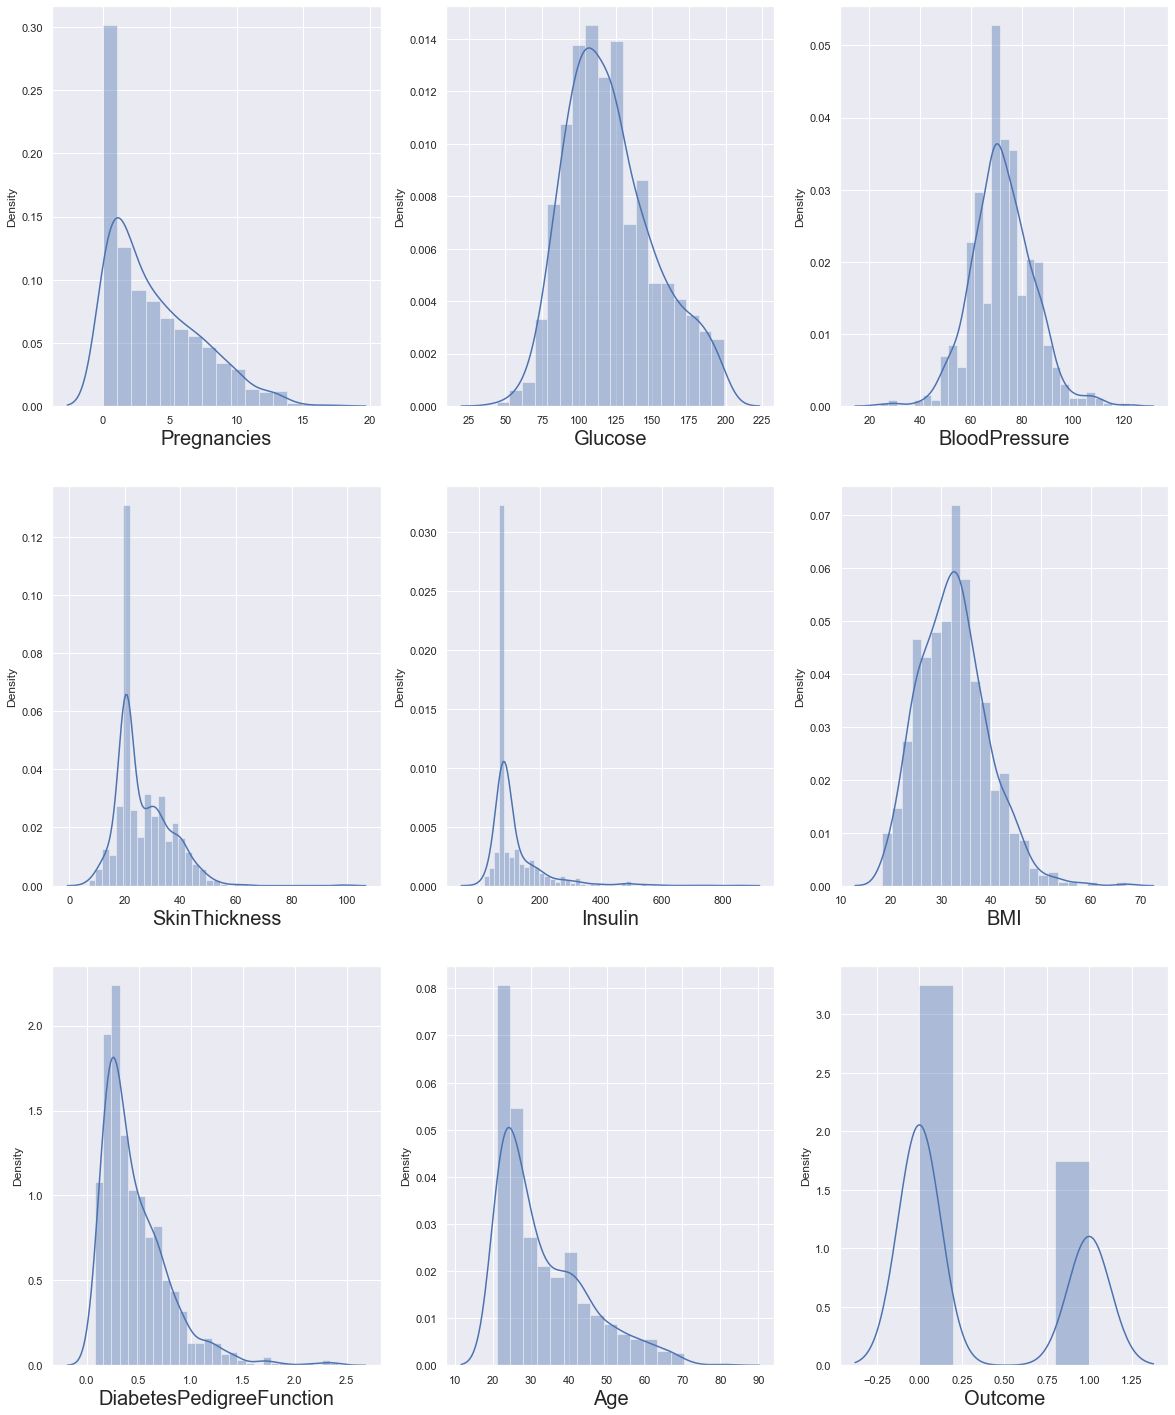

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

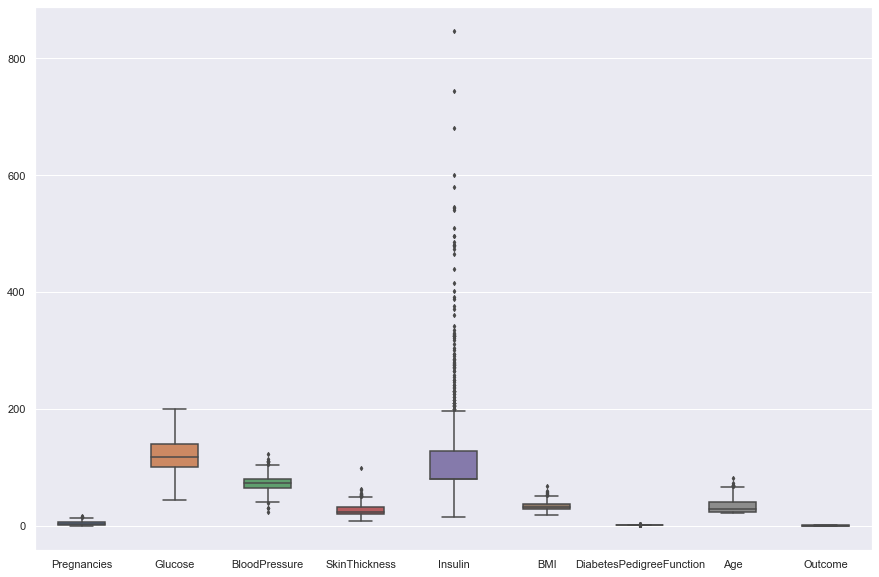

In [10]:
# Dealing with outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

Insuline column has many outliers

In [11]:
# Cleaning outliers
q = data['Pregnancies'].quantile(0.98)
data_cleaned = data[data['Pregnancies']<q]  # removing the top 2% data from Pregnancies column

q = data_cleaned['BMI'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]

q =  data_cleaned['Insulin'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Age']<q]

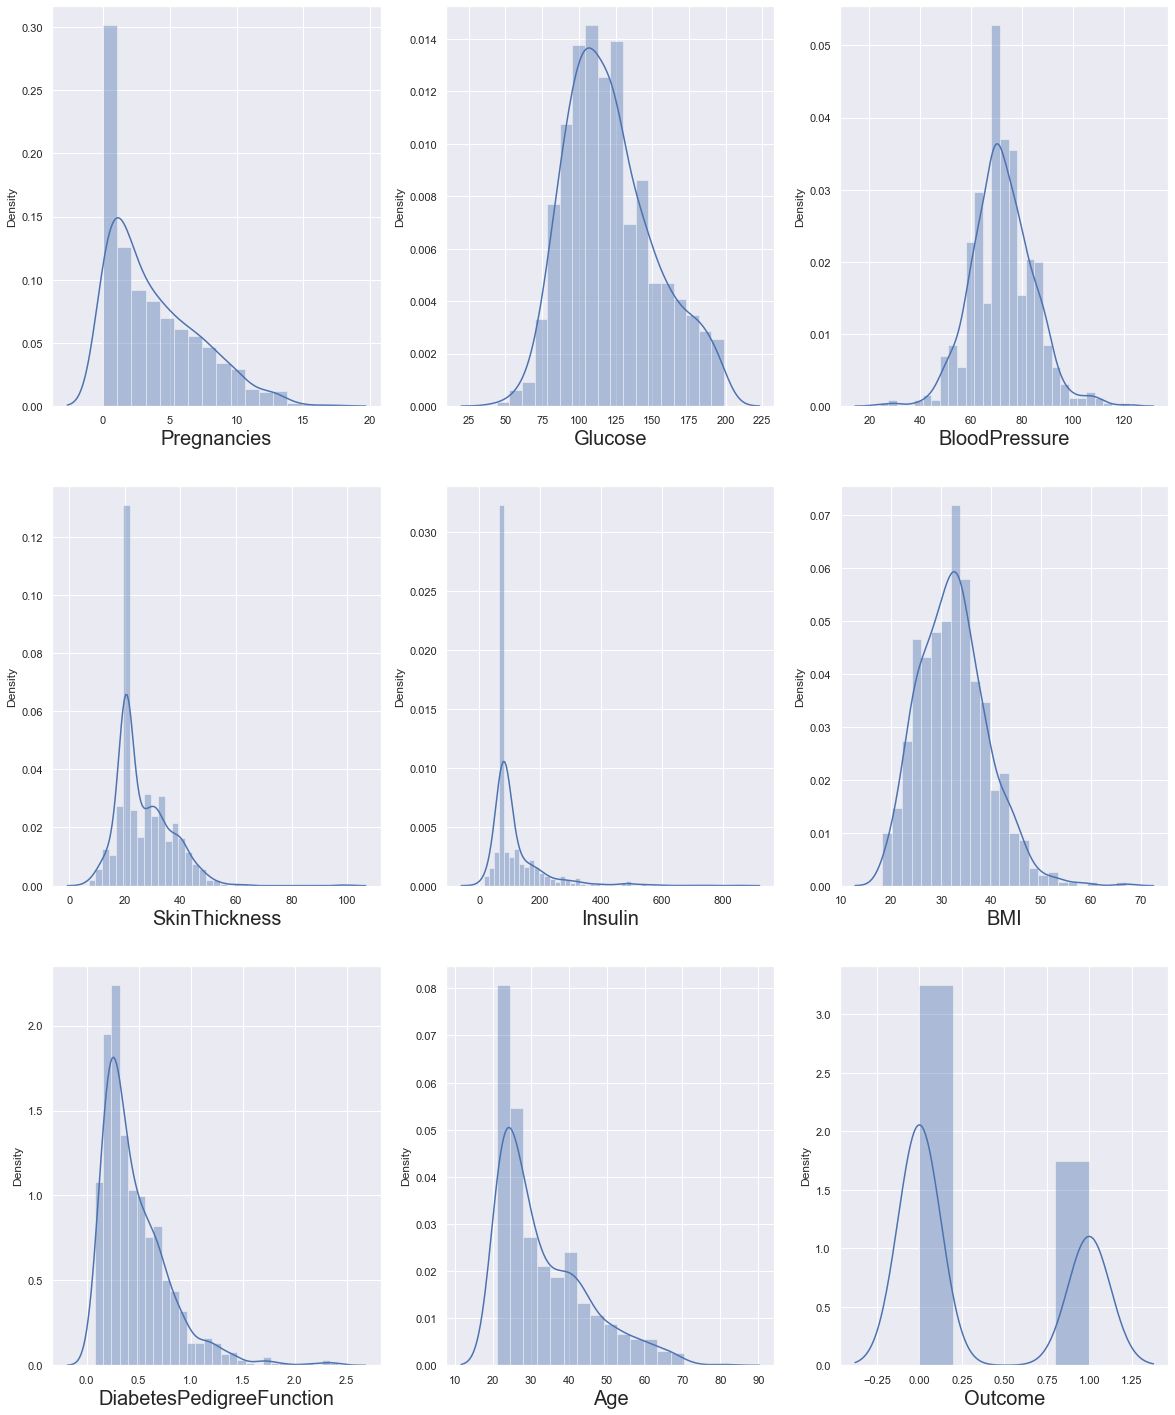

In [12]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [13]:
# Independent and dependent features
X = data.drop(columns=['Outcome'])
y = data['Outcome']

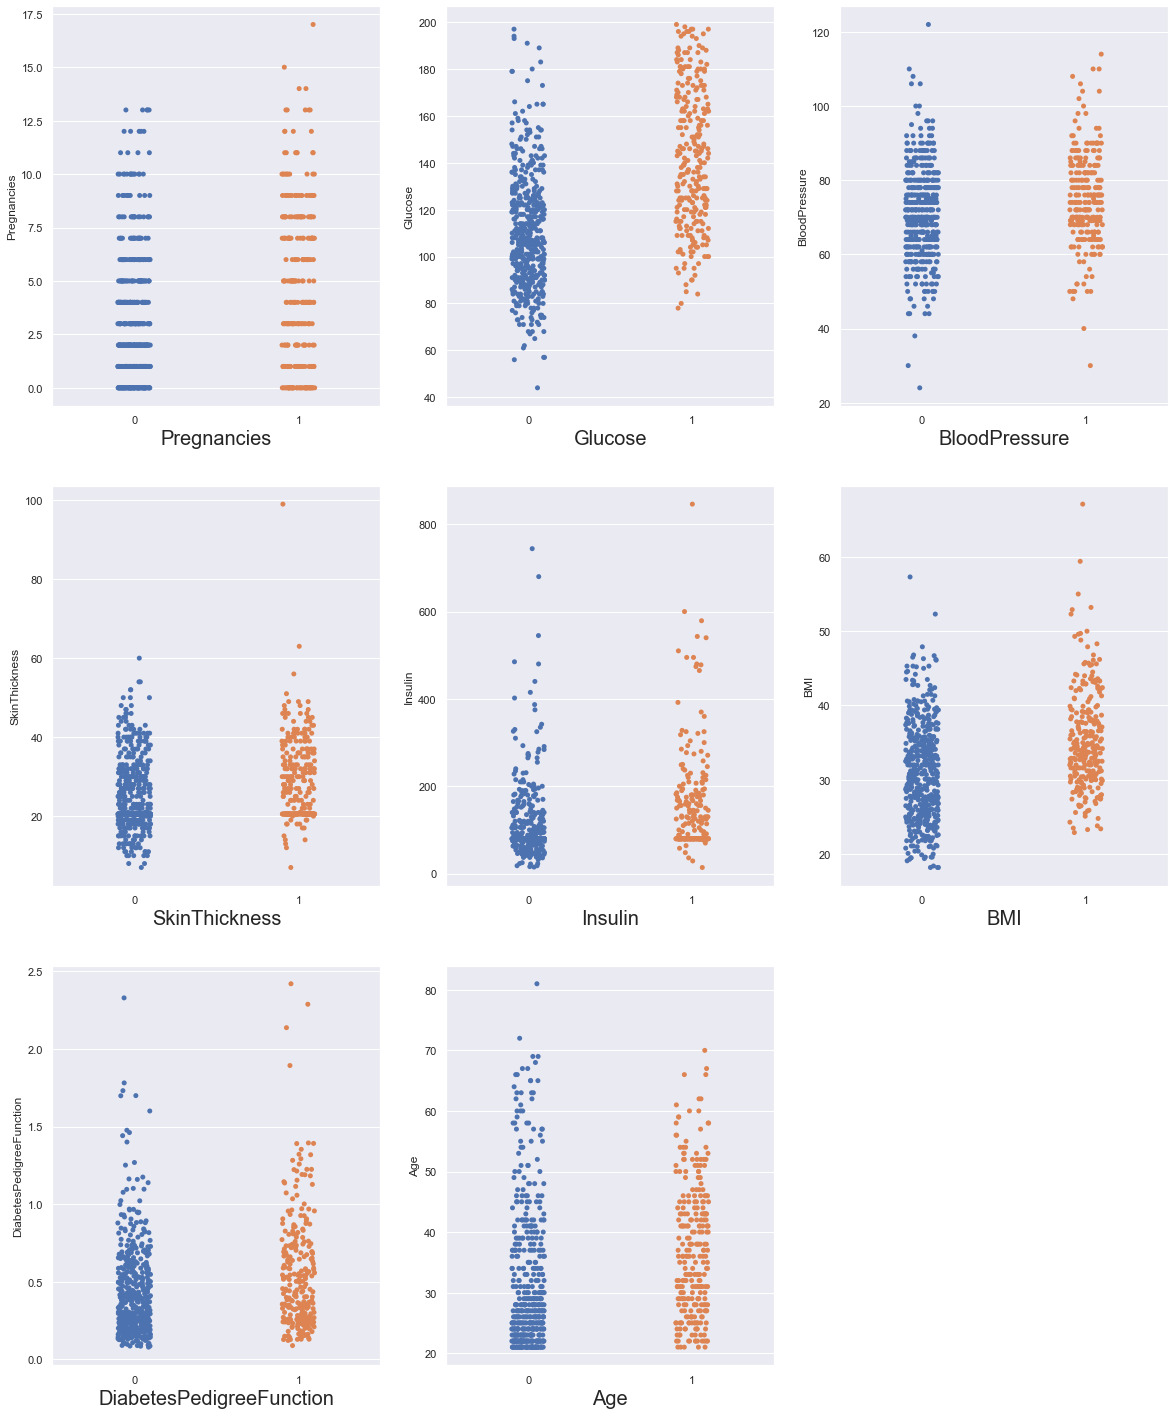

In [14]:
# Distribution of categories per colum
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y, X[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [15]:
# Scaling data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [16]:
X_scaled.shape

(768, 8)

In [17]:
type(X_scaled)

numpy.ndarray

In [18]:
# Check multicollienarity with VIF
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns
vif

,VIF,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


VIF less than 5, there is no multicollienarity.

## Logistic Regression

Applied to classification problems. It calculates the probability that a given value belongs to a specified class.


In [19]:
# Logistic Regression Model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=355)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [20]:
log_reg.classes_

array([0, 1])

In [21]:
log_reg.intercept_

array([-0.86307309])

In [22]:
log_reg.coef_

array([[ 0.47095526,  1.17054917, -0.10240229, -0.07721679, -0.18434232,
         0.6452653 ,  0.29004074,  0.1991417 ]])

In [23]:
# Prediction
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [24]:
log_reg.predict_proba(X_test)

array([[0.81756706, 0.18243294],
       [0.71179737, 0.28820263],
       [0.68334273, 0.31665727],
       [0.70713341, 0.29286659],
       [0.90305982, 0.09694018],
       [0.69400266, 0.30599734],
       [0.82058445, 0.17941555],
       [0.82591547, 0.17408453],
       [0.58468526, 0.41531474],
       [0.54356631, 0.45643369],
       [0.8916768 , 0.1083232 ],
       [0.95488627, 0.04511373],
       [0.64347789, 0.35652211],
       [0.09878942, 0.90121058],
       [0.03852083, 0.96147917],
       [0.78308696, 0.21691304],
       [0.54426504, 0.45573496],
       [0.92928552, 0.07071448],
       [0.69117556, 0.30882444],
       [0.98861963, 0.01138037],
       [0.94038403, 0.05961597],
       [0.3147071 , 0.6852929 ],
       [0.67485477, 0.32514523],
       [0.96872502, 0.03127498],
       [0.6079026 , 0.3920974 ],
       [0.61976539, 0.38023461],
       [0.60370636, 0.39629364],
       [0.90033811, 0.09966189],
       [0.90061905, 0.09938095],
       [0.91135592, 0.08864408],
       [0.

In [25]:
log_reg.score(X_train, y_train)

0.7881944444444444

In [26]:
log_reg.score(X_test, y_test)

0.7552083333333334

In [27]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7552083333333334

In [28]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]])

In [29]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [30]:
#Precision
precision = true_positive/(true_positive + false_positive)
precision

0.88

In [31]:
# Recall
recall = true_positive/(true_positive+false_negative)
recall

0.7746478873239436

In [32]:
# F1 Score
f1Score = 2*precision*recall/(precision+recall)
f1Score

0.8239700374531835

In [33]:
# AUC
auc_log_reg = roc_auc_score(y_test, y_pred)
auc_log_reg

0.7011940298507463

In [34]:
# ROC
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

In [35]:
thresholds

array([2, 1, 0])

In [36]:
report_log_reg = classification_report(y_test, y_pred)
print(report_log_reg)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       125
           1       0.70      0.52      0.60        67

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



In [37]:
# Prediction example
x = [[0, 100, 70, 10, 50, 30.5, 0.5, 42]]
x_scaled = scalar.fit_transform(x)
y_pred = log_reg.predict(x)
y_pred

array([1])

In [38]:
log_reg.predict_proba(x_scaled)

array([[0.70330231, 0.29669769]])

## Decision Tree

In [39]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import utils
from sklearn import preprocessing
from IPython.display import Image
import pydotplus

In [40]:
# DT Model
# Model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=355)

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
feature_name = list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [42]:
class_name

[1, 0]

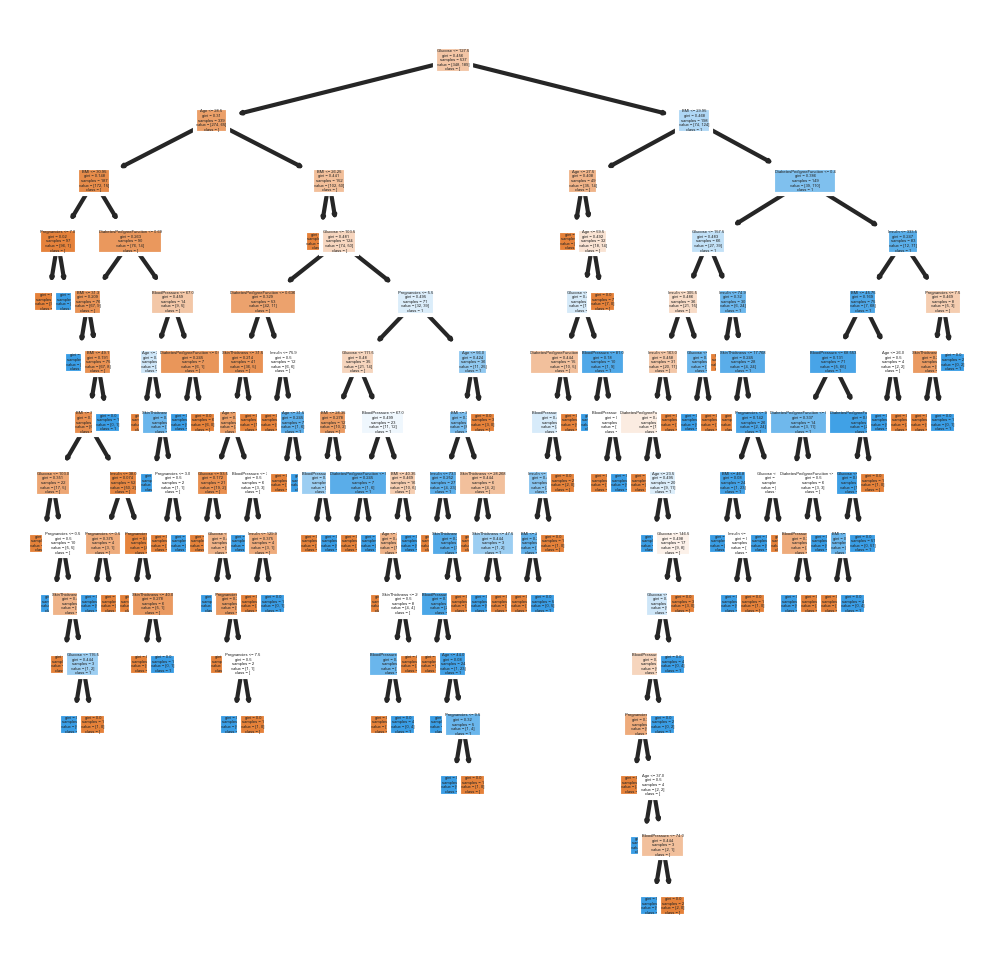

In [43]:
# Plot decision tree

#fig = plt.figure(figsize=(20,20))
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
graph =tree.plot_tree(dec_tree, feature_names=feature_name, class_names=str(class_name), filled=True)

In [44]:
fig.savefig("decision_tree.png")

In [45]:
y_pred = dec_tree.predict(X_test)
dec_tree.score(X_test, y_test)

0.6796536796536796

In [46]:
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       152
           1       0.53      0.49      0.51        79

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



Let us improve the accuracy.

### Hyperparameters Tunning

In [47]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

grid_search = GridSearchCV(estimator=dec_tree,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [48]:
best_parameters = grid_search.best_params_
best_parameters

{'criterion': 'entropy',
 'max_depth': 24,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'random'}

In [49]:
dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, min_samples_split=4, 
                            splitter='random')
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4,
                       splitter='random')

In [50]:
dec_tree.score(X_test,y_test)

0.70995670995671

Score improved!

In [51]:
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       152
           1       0.53      0.49      0.51        79

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



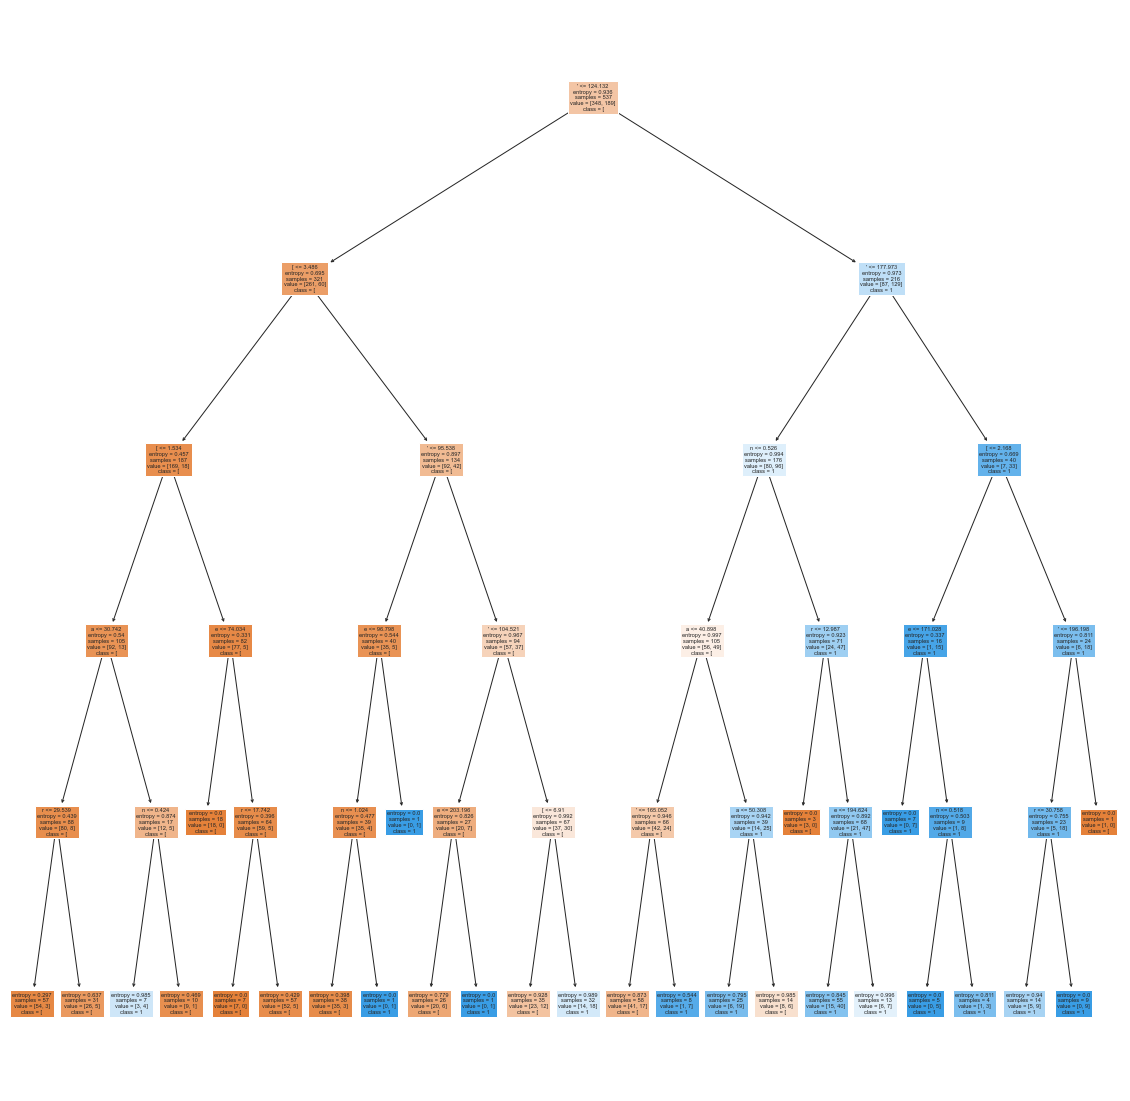

In [52]:
# New plot
fig = plt.figure(figsize=(20,20))
graph =tree.plot_tree(dec_tree, feature_names=str(feature_name), class_names=str(class_name), filled=True)

### Ensemble techniques

They try to split the training data in different ways to aggregate the scores of different models. At the end, the general score is improved because the variance is reduced keeping the same bias.

#### Bagging

It divides the training dataset in different samples using replacement (boosttrapping). The models are trained in parallalel
and at the final result comes from the aggregation of the different individual results.

In [53]:
from sklearn.ensemble import BaggingClassifier

dec_tree_bagging = BaggingClassifier(dec_tree,
                                    n_estimators=50,
                                    max_samples=0.5,
                                    bootstrap=True,
                                    random_state=355, oob_score=True)

dec_tree_bagging.fit(X_train, y_train)
dec_tree_bagging.score(X_test, y_test)

0.7619047619047619

It works!

In [54]:
# AUC
y_pred = dec_tree_bagging.predict(X_test)
auc_dec_tree_bagging = roc_auc_score(y_test, y_pred)
auc_dec_tree_bagging

0.7005329780146569

#### Passing

The idea is the same as bagging but there is no replacement building the differnet subsets of training datasets. This cause less diversity in the sampled dataset and training data becomes correlated. Then, in general bagging is preferred over pasting.

In [55]:
dec_tree_passing = BaggingClassifier(dec_tree,
                                    n_estimators=50,
                                    max_samples=0.5,
                                    bootstrap=False,
                                    random_state=355)

dec_tree_passing.fit(X_train, y_train)
dec_tree_passing.score(X_test, y_test)

0.7662337662337663

In [56]:
# AUC
y_pred = dec_tree_passing.predict(X_test)
auc_dec_tree_passing = roc_auc_score(y_test, y_pred)
auc_dec_tree_passing

0.7099017321785477

In [57]:
# ROC
fpr_dec_tree, tpr_dec_tree, thresholds_dec_tree = roc_curve(y_test,y_pred)

## Random Forest

Main differences to respect Decison Tress and bagging: It introduces more randommness while creating trees which will help to reduce correlation between sample datasets.
Only some predictors are allowed to build the split.

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rand_forest = RandomForestClassifier(random_state=1)
# random_state: if given none then score will vary everytime you run the RandomForestClassifier. If we asssign a value to it, then result will remain constant.

In [60]:
rand_forest.fit(X_train, y_train)
rand_forest.feature_importances_

array([0.08629256, 0.26156254, 0.08624496, 0.07870505, 0.07547343,
       0.1601654 , 0.11363002, 0.13792605])

In [61]:
rand_forest.score(X_test, y_test)

0.7662337662337663

#### Hyperparameter Tunning

In [62]:
#grid_param = {
#    "n_estimators" : [90,100,115,130],
#    'criterion': ['gini', 'entropy'],
#    'max_depth' : range(2,20,1),
#    'min_samples_leaf' : range(1,10,1),
#    'min_samples_split': range(2,10,1),
#    'max_features' : ['auto','log2']
#}

#grid_search = GridSearchCV(estimator=rand_forest, param_grid=grid_param, cv=5, n_jobs=-1, verbose=1)
#grid_search.fit(x_train, y_train)

In [63]:
# Results obtained in google colab to save computing time

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 90}

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 90}

In [64]:
#grid_search.best_params_

In [65]:
rand_forest = RandomForestClassifier(criterion='gini',
                                    max_depth=8,
                                     max_features = 'log2',
                                    min_samples_leaf=3,
                                    min_samples_split=2,
                                    n_estimators=90)

In [66]:
rand_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=3,
                       n_estimators=90)

In [67]:
rand_forest.score(X_test, y_test)

0.7359307359307359

In [68]:
# AUC
y_pred = rand_forest.predict(X_test)
auc_rand_forest = roc_auc_score(y_test, y_pred)
auc_rand_forest

0.6929546968687541

In [69]:
# ROC
fpr_rand_forest, tpr_rand_forest, thresholds_rand_forest = roc_curve(y_test,y_pred)

## XGBosst

In [70]:
#!pip install -U xgboost

In [71]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=355)

In [73]:
xgboost = XGBClassifier(objective='binary:logistic')
xgboost.fit(X_train, y_train)

[15:46:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
# Predicitions
y_pred = xgboost.predict(X_train)

In [75]:
# Train accuracy
accuracy_train = accuracy_score(y_train, y_pred)
accuracy_train

1.0

In [76]:
# Test accuracy
y_pred = xgboost.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_test

0.7083333333333334

In [77]:
# AUC
auc_xgboost = roc_auc_score(y_test, y_pred)
auc_xgboost

0.6617313432835822

In [78]:
# ROC
fpr_xgboost, tpr_xgboost, thresholds_dec_tree = roc_curve(y_test,y_pred)

In [79]:
# Random prediction
y_random = [[6,148,72,35,80,33.6,0.627,50]]
example = scalar.transform(y_random)
y_random_pred = xgboost.predict(example)
y_random_pred[0]

1

## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

### Ball tree

In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [82]:
y_pred = knn.predict(X_test)

In [83]:
knn.score(X_train, y_train)

0.8263888888888888

In [84]:
knn.score(X_test, y_test)

0.7447916666666666

In [85]:
accuracy_score(y_test, y_pred)

0.7447916666666666

#### Hyperparameter Tunning

In [86]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

grid_search = GridSearchCV(knn, param_grid, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=1)

In [87]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 9}

In [88]:
knn_tun = KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12)
knn_tun.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12)

In [89]:
knn_tun.score(X_train, y_train)

0.7986111111111112

In [90]:
knn_tun.score(X_test, y_test)

0.734375

Apparently, tunning hyperparameters does not improve accuracy.

In [91]:
# AUC
y_pred = knn.predict(X_test)
auc_knn = roc_auc_score(y_test, y_pred)
auc_knn

0.7001194029850746

In [92]:
# ROC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test,y_pred)

### K-fold Cross Validation

In [94]:
kfold = KFold(n_splits=12)
kfold.get_n_splits(X_scaled)

12

In [95]:
# Let us compute the average test score with kfold=12
from statistics import mean

knn = KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12)

cnt = 0
count=[]
train_score=[]
test_score=[]

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn.fit(X_train, y_train)
    train_score_ = knn.score(X_train, y_train)
    test_score_ = knn.score(X_test, y_test)
    cnt += 1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k= ", cnt)
    print("train_score: ", train_score_, " | test_score: ", test_score_)
    
print("--------------------------")
print("Average train score: ", mean(train_score))
print("Average test score: ", mean(test_score))
    

for k=  1
train_score:  0.8167613636363636  | test_score:  0.6875
for k=  2
train_score:  0.7897727272727273  | test_score:  0.796875
for k=  3
train_score:  0.7954545454545454  | test_score:  0.796875
for k=  4
train_score:  0.7911931818181818  | test_score:  0.734375
for k=  5
train_score:  0.7826704545454546  | test_score:  0.671875
for k=  6
train_score:  0.7897727272727273  | test_score:  0.765625
for k=  7
train_score:  0.7926136363636364  | test_score:  0.734375
for k=  8
train_score:  0.7826704545454546  | test_score:  0.828125
for k=  9
train_score:  0.7798295454545454  | test_score:  0.859375
for k=  10
train_score:  0.7940340909090909  | test_score:  0.75
for k=  11
train_score:  0.8011363636363636  | test_score:  0.6875
for k=  12
train_score:  0.7840909090909091  | test_score:  0.75
--------------------------
Average train score:  0.7916666666666666
Average test score:  0.7552083333333334


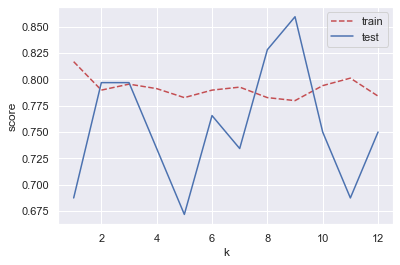

In [96]:
# Plotting scores vs kfolds

plt.plot(count, train_score,'r--',label='train')
plt.plot(count, test_score, 'b-',label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()

## Support Vector Machines

In [97]:
from  sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [98]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [99]:
y_pred = svc.predict(X_test)

In [100]:
svc.score(X_train, y_train)

0.8267045454545454

In [101]:
svc.score(X_test, y_test)

0.828125

#### Hyperparameter Tunning

In [102]:
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

grid_search = GridSearchCV(SVC(), param_grid, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             verbose=1)

In [103]:
grid_search.best_params_

{'C': 1, 'gamma': 0.01}

In [104]:
svc = SVC(C=10, gamma=0.01)
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [105]:
svc.score(X_test, y_test)

0.796875

In [106]:
# AUC
y_pred = svc.predict(X_test)
auc_svc = roc_auc_score(y_test, y_pred)
auc_svc

0.7471794871794872

In [107]:
# ROC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test,y_pred)

## Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB

In [109]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [110]:
y_pred = nb.predict(X_test)
nb.score(X_test, y_test)

0.734375

In [111]:
accuracy_score(y_test, y_pred)

0.734375

In [112]:
# AUC
auc_bn = roc_auc_score(y_test, y_pred)
auc_bn

0.7030769230769232

In [113]:
# ROC
fpr_bn, tpr_bn, thresholds_bn = roc_curve(y_test,y_pred)

## Linear Discriminat Analysis

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [115]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [116]:
y_pred = lda.predict(X_test)

In [117]:
lda.score(X_train, y_train)

0.7684659090909091

In [118]:
lda.score(X_test, y_test)

0.828125

In [119]:
# AUC
auc_lda = roc_auc_score(y_test, y_pred)
auc_lda

0.7871794871794872

In [120]:
# ROC
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test,y_pred)

## Models Comparison

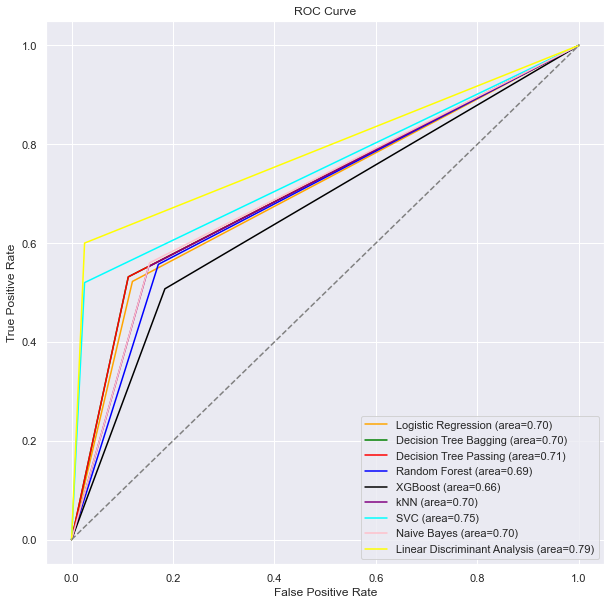

In [121]:
# ROC comparison

fig = plt.figure(figsize=(10,10))

plt.plot(fpr,tpr, color='orange', label='Logistic Regression (area=%0.2f)' % auc_log_reg)
plt.plot(fpr_dec_tree,tpr_dec_tree, color='green',
         label='Decision Tree Bagging (area=%0.2f)' % auc_dec_tree_bagging)
plt.plot(fpr_dec_tree,tpr_dec_tree, color='red',
         label='Decision Tree Passing (area=%0.2f)' % auc_dec_tree_passing)
plt.plot(fpr_rand_forest,tpr_rand_forest, color='blue',
         label='Random Forest (area=%0.2f)' % auc_rand_forest)
plt.plot(fpr_xgboost,tpr_xgboost, color='black',
         label='XGBoost (area=%0.2f)' % auc_xgboost)
plt.plot(fpr_knn,tpr_knn, color='purple',
         label='kNN (area=%0.2f)' % auc_knn)
plt.plot(fpr_svc,tpr_svc, color='cyan',
         label='SVC (area=%0.2f)' % auc_svc)
plt.plot(fpr_bn,tpr_bn, color='pink',
         label='Naive Bayes (area=%0.2f)' % auc_bn)
plt.plot(fpr_lda,tpr_lda, color='yellow',
         label='Linear Discriminant Analysis (area=%0.2f)' % auc_lda)
plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

According to the AUC ROC, the best model is Naive Bayes.
Another way to compare the performance is applying k-fold cross validation on all of them. Let's use k=12. 

LR: 0.776042 (0.052590)
DTP: 0.765619 (0.060437)
RF: 0.764217 (0.068562)
[15:49:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 

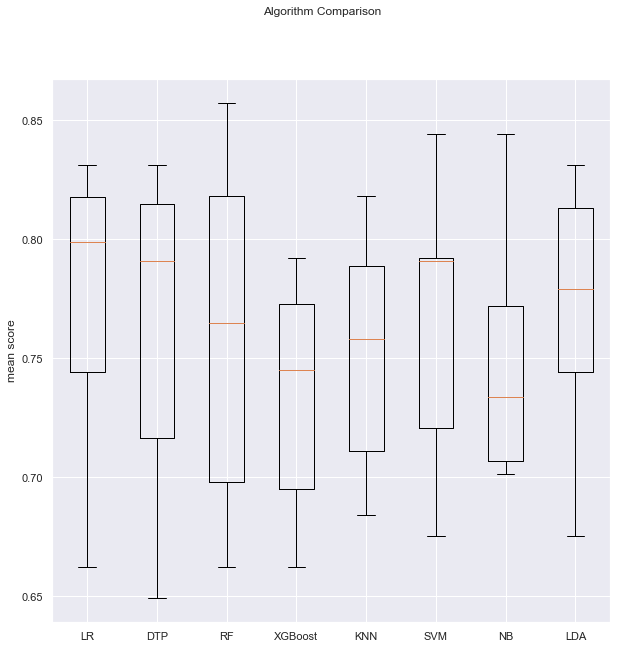

In [123]:
### K-fold Cross Validation
from sklearn import model_selection

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', log_reg))
models.append(('DTP', dec_tree_passing))
models.append(('RF', rand_forest))
models.append(('XGBoost', xgboost))
models.append(('KNN', knn))
models.append(('SVM', svc))
models.append(('NB', nb))
models.append(('LDA', lda))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_scaled, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("mean score")
ax.set_xticklabels(names)
plt.show()

According to the results, Logistic Regression and Linear Discriminant Analysis are the best models.

In [124]:
models

[('LR', LogisticRegression()),
 ('DTP',
  BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                          max_depth=5,
                                                          min_samples_split=4,
                                                          splitter='random'),
                    bootstrap=False, max_samples=0.5, n_estimators=50,
                    random_state=355)),
 ('RF',
  RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=3,
                         n_estimators=90)),
 ('XGBoost',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.300000012, max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100,

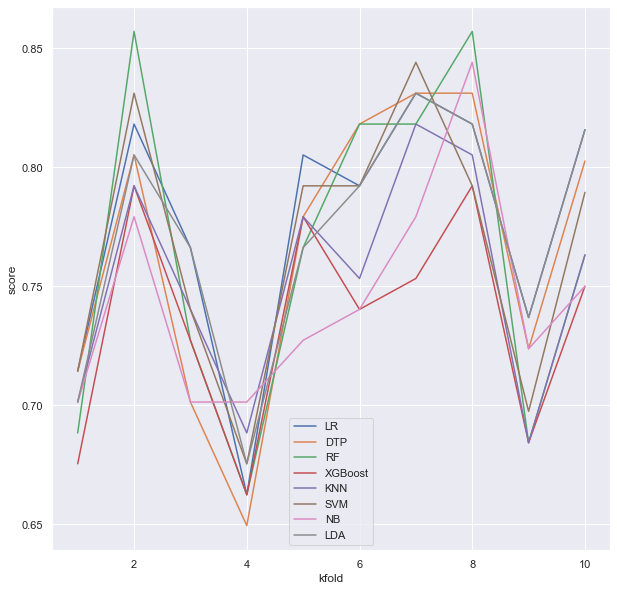

In [125]:
# Plotting models versus K-fold Cross Validation

fig = plt.figure(figsize=(10,10))
kfold = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(0,len(results)):
    for j in range(0,len(results)):
        if i == j:
            plt.plot(kfold, results[i], label=models[i][0])
            plt.xlabel('kfold')
            plt.ylabel('score')
            plt.legend()

## Stacking

Stacking is an ensemble technique where a meta-model is built based on models with less performance to increase the overall accuracy. The predicitons of those models are used as an input features of the meta-model to train on and give prediction.

Let's implement stacking to improve the accuracy of our dataset prediction.

In [126]:
# Divide the dataset into training set and hold out set by 50%
train, val_train, test, val_test = train_test_split(X_scaled, y, test_size=0.5, random_state=3)

print(len(train))
print(len(val_train))
print(len(test))
print(len(val_test))

384
384
384
384


In [127]:
# Splitting the training set into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=4)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

268
116
268
116


#### Attempt 1

I use Logistic Regression and Linear Discriminant Analysis as base models.

In [128]:
log_reg.fit(x_train, y_train)
log_reg.score(x_test, y_test)

0.7931034482758621

In [129]:
lda.fit(x_train, y_train)
lda.score(x_test, y_test)

0.7931034482758621

In [130]:
# Predictions of all the base models on the validation sets
predict_val1 = log_reg.predict(val_train)
predict_val2 = lda.predict(val_train)

In [131]:
# stack predicitons for validation set together
predict_val = np.column_stack((predict_val1, predict_val2))
predict_val

array([[0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

In [132]:
# Prediction of text models on the test set
predict_test1 = log_reg.predict(x_test)
predict_test2 = lda.predict(x_test)

In [133]:
# Stacking predicitons for validation
predict_test = np.column_stack((predict_test1, predict_test2))
predict_test

array([[1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0,

In [134]:
# Let use the predict_val data for a Random Forest meta-model
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val, val_test)

RandomForestClassifier()

In [135]:
rand_clf.score(predict_test, y_test)

0.7931034482758621

In [136]:
# Tunning hyperparameters

grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

grid_search = GridSearchCV(estimator=rand_clf, param_grid=grid_param, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(predict_val, val_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=1)

In [137]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 90}

In [138]:
rand_clf = RandomForestClassifier(criterion='gini',
                                 max_features='log2',
                                 min_samples_leaf=1,
                                 min_samples_split=4,
                                 n_estimators=90)

In [139]:
rand_clf.fit(predict_val, val_test)

RandomForestClassifier(max_features='log2', min_samples_split=4,
                       n_estimators=90)

In [140]:
rand_clf.score(predict_test, y_test)

0.7931034482758621

In [141]:
# Another way for stacking
from mlxtend.classifier import StackingClassifier

stack_clf = StackingClassifier(classifiers=[log_reg,lda], use_probas=True, meta_classifier=rand_clf)

In [142]:
stack_clf.fit(predict_val, val_test)

StackingClassifier(classifiers=[LogisticRegression(),
                                LinearDiscriminantAnalysis()],
                   meta_classifier=RandomForestClassifier(max_features='log2',
                                                          min_samples_split=4,
                                                          n_estimators=90),
                   use_probas=True)

In [143]:
stack_clf.score(predict_test, y_test)

0.7931034482758621

Final score: 0.79!

#### Attempt 2

Using all models previously used as based models, and Random Forest as meta-model.

In [144]:
dec_tree_passing.fit(x_train, y_train)
dec_tree_passing.score(x_test, y_test)

0.7672413793103449

In [145]:
xgboost.fit(x_train, y_train)
xgboost.score(x_test, y_test)

[15:55:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7327586206896551

In [146]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.7844827586206896

In [147]:
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.7672413793103449

In [148]:
nb.fit(x_train, y_train)
nb.score(x_test, y_test)

0.7413793103448276

In [149]:
# Predictions of all the base models on the validation sets
predict_val3 = dec_tree_passing.predict(val_train)
predict_val4 = xgboost.predict(val_train)
predict_val5 = knn.predict(val_train)
predict_val6 = svc.predict(val_train)
predict_val7 = nb.predict(val_train)

In [150]:
# stack predictions for validation set together
predict_val = np.column_stack((predict_val1, predict_val2,predict_val3, predict_val4,
                              predict_val5, predict_val6, predict_val7))
predict_val

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [151]:
# Prediction of text models on the test set
predict_test3 = dec_tree_passing.predict(x_test)
predict_test4 = xgboost.predict(x_test)
predict_test5 = knn.predict(x_test)
predict_test6 = svc.predict(x_test)
predict_test7 = nb.predict(x_test)

In [152]:
# Stacking predictions for validation
predict_test = np.column_stack((predict_test1, predict_test2,predict_test3, predict_test4,
                               predict_test5, predict_test6, predict_test7))
predict_test

array([[1, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1],
       [0,

In [153]:
# Meta-model
rand_clf_2 = RandomForestClassifier()
rand_clf_2.fit(predict_val, val_test)

RandomForestClassifier()

In [154]:
rand_clf_2.score(predict_test, y_test)

0.8017241379310345

In [155]:
# Tunning hyperparameters

grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

grid_search = GridSearchCV(estimator=rand_clf_2,param_grid=grid_param,cv=5, n_jobs=-1, verbose=1)
grid_search.fit(predict_val, val_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [90, 100, 115]},
             verbose=1)

In [156]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 90}

In [157]:
rand_clf_2h = RandomForestClassifier(criterion='gini',
                                 max_features='auto',
                                 min_samples_leaf=1,
                                 min_samples_split=4,
                                 n_estimators=115)

In [158]:
rand_clf_2h.fit(predict_val, val_test)
rand_clf_2h.score(predict_test, y_test)

0.8017241379310345

## Accuracy results

In [165]:
results = pd.DataFrame()
results['Models'] = ['Logistic Regression','Decision Tree Bagging',
                    'Decision Tree Passing', 'Random Forest', 'XGBoost', 'KNN',
                    'SVC', 'Naive Bayes','Linear Discriminat Analysis']
results['Accuracy'] = [auc_log_reg, auc_dec_tree_bagging, auc_dec_tree_passing,
                      auc_rand_forest, auc_xgboost, auc_knn, auc_svc, auc_bn, auc_lda]
results

,Models,Accuracy
0,Logistic Regression,0.701194
1,Decision Tree Bagging,0.700533
2,Decision Tree Passing,0.709902
3,Random Forest,0.692955
4,XGBoost,0.661731
5,KNN,0.700119
6,SVC,0.747179
7,Naive Bayes,0.703077
8,Linear Discriminat Analysis,0.787179


Attemt2 without hyperparameter tunning has better score: 0.81!

In [166]:
# Save the best model for production: log_reg is used for simplification, its score (0.77) is similar to rand_clf_2 (0.80)
import pickle

with open('classificationModel.sav', 'wb') as f:
    pickle.dump(log_reg, f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)